In [1]:
import pandas as pd
import numpy as np
import re
import xgboost as xgb
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score


In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
true_data = pd.read_csv('True.csv')
fake_data = pd.read_csv('Fake.csv')

# Add labels
true_data['label'] = 1  # True news
fake_data['label'] = 0  # Fake news

true_sample = true_data.sample(n=7000, random_state=42)
fake_sample = fake_data.sample(n=7000, random_state=42)

# Combine and shuffle the sampled datasets
sampled_data = pd.concat([true_sample, fake_sample], axis=0).reset_index(drop=True)

sampled_data = sampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Combine datasets
data = pd.concat([true_data, fake_data], axis=0).reset_index(drop=True)

In [6]:
# Preprocessing: Combine title and text columns
data['content'] = data['title'] + " " + data['text']

# Drop unnecessary columns
data = data[['content', 'label']]


sampled_data['content'] = sampled_data['title'] + " " + sampled_data['text']
sampled_data = sampled_data[['content', 'label']]

In [7]:
def preprocess_text(text):
    # Remove special characters, numbers, and extra spaces, also lowercase and convert the string to words
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()

    # Remove stop words and lemmatize
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords.words('english')]

    return ' '.join(text)

# Apply preprocessing
sampled_data['content'] = sampled_data['content'].apply(preprocess_text)

In [8]:
X = sampled_data['content']
y = sampled_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [10]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(kernel='linear', probability=True)

}

In [11]:
# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

print("All models trained and saved successfully.")

Training Logistic Regression...
Logistic Regression Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2100
           1       0.98      0.99      0.98      2100

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200

Training Random Forest...
Random Forest Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2100
           1       0.99      0.99      0.99      2100

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200

Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:15:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2100
           1       0.99      1.00      1.00      2100

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200

Training SVM...
SVM Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2100
           1       0.99      0.99      0.99      2100

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200

All models trained and saved successfully.


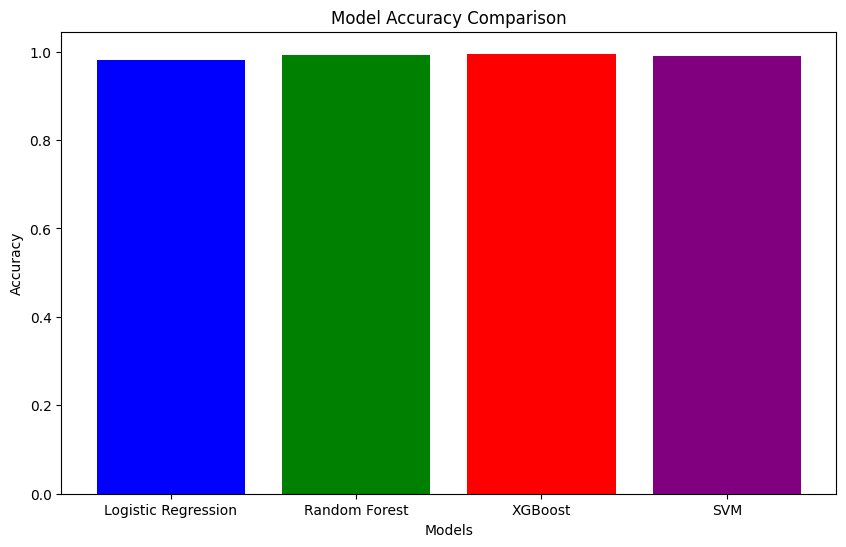

In [12]:

import matplotlib.pyplot as plt

# Storing Accuracy values for each model dynamically
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM']
accuracies = []

for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the different values
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


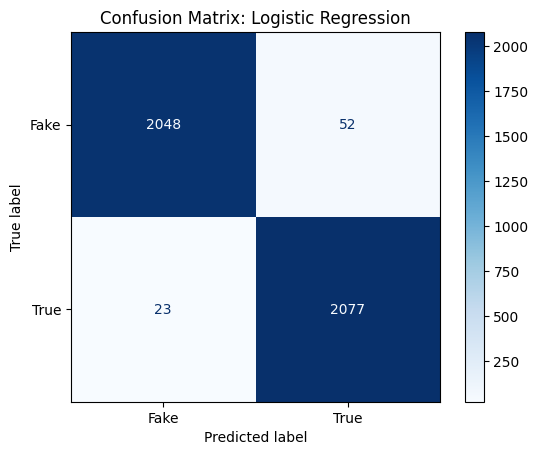

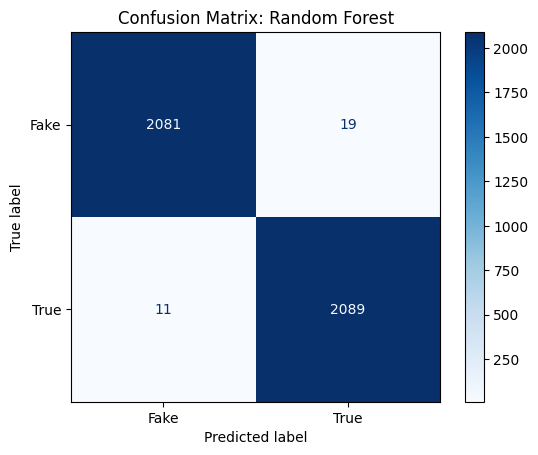

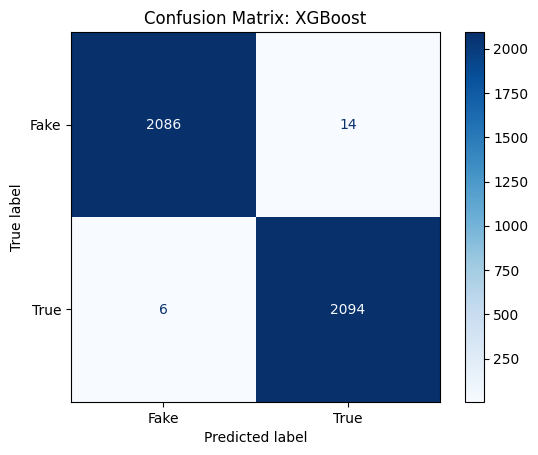

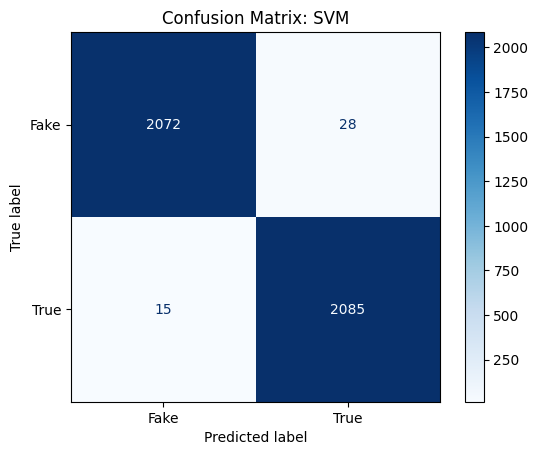

In [13]:

# making the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Fake', 'True'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()
